# A note on lognormal distributions

When we use the lognormal normal distribution to generate random values like

```
np.random.lognormal( mu, sigma)
```

We're actually specifying the mean and standard deviation for the underlying normal distribution and then taking the exponential of of those random numbers.  So the logarithm of our random numbers will have mean `mu` and standard deviation `sigma`.  To see how this works lets compute a sample of 10 random numbers two different ways. We're going to specify $\mu = 8$ and $\sigma =3$.  We'll reset a random number seed each time to see how the results compare.  First we'll generate 10 normally distributed random numbers and apply the exponential function.

In [10]:
import numpy as np
np.random.seed(123)
x1 = np.random.normal(loc = 8, scale = 3, size = 10)
exp_x1 = np.exp(x1)
print(exp_x1)

[1.14790438e+02 5.93992180e+04 6.96696864e+03 3.24959627e+01
 5.25420684e+02 4.22654192e+05 2.05435570e+00 8.23251805e+02
 1.32960687e+05 2.21357445e+02]


Notice those numbers can't possibly come from a distribution whose mean is 8, but if we were to take the log of those numbers:

In [5]:
print(np.log(exp_x1))

[ 4.74310819 10.99203634  8.84893549  3.48111586  6.26419924 12.95430961
  0.71996227  6.71326211 11.79780878  5.39977879]


Those numbers could come from a distribution with mean 8.  When we specify a random variable is lognormal distributed with mean $\mu$ and standard deviation $\sigma$ it means that the logarithm of the random variable follows a normal distribution with the specified parameters.  

The second method for generating the lognormal random numbers is to just use the lognormal distribution from numpy:

In [13]:
np.random.seed(123)
x2 = np.random.lognormal( mean = 8, sigma = 3, size = 10)
print(x2)
print(np.log(x2))

[1.14790438e+02 5.93992180e+04 6.96696864e+03 3.24959627e+01
 5.25420684e+02 4.22654192e+05 2.05435570e+00 8.23251805e+02
 1.32960687e+05 2.21357445e+02]
[ 4.74310819 10.99203634  8.84893549  3.48111586  6.26419924 12.95430961
  0.71996227  6.71326211 11.79780878  5.39977879]


Notice that these are exactly the same random numbers as we generated using the first approach.  Suppose we want the lognormal distribution to have mean $m$ and standard deviation $s$ then we need to reverse engineer the parameters $\mu$ and $\sigma$ for the underlying normal distribution:

$$ \mu = \log\left( \frac{m^2}{\sqrt{s^2 + m^2}} \right)$$
$$ \sigma = \ \sqrt{ \log\left( 1 + \frac{s^2}{m^2} \right)}$$

You can find these formulas in a variety of places, including <a href="https://en.wikipedia.org/wiki/Log-normal_distribution">Wikipedia</a>.

To generate a sample of 1000 observations from a lognormal distribution with mean 8 and standard deviation 3 we could do this:

7.976618073692172
2.761749387482237


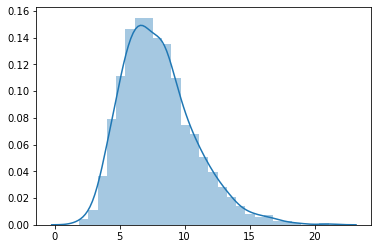

In [9]:
m = 8 
s = 3
mu = np.log( m**2 / np.sqrt(s**2 + m**2)); 
sig = np.sqrt( np.log( 1 + s**2/m**2) );
x = np.random.lognormal( mean = mu, sigma = sig, size = 1000)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(x)
print(np.mean(x))
print(np.std(x))

Of course the mean and standard deviation of the **sample** aren't exactly 8 and 3, respectively but that is just the usual sampling variability.